In [1]:
import os
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from src.waveform.utils import load_waveform, trim_waveform
from src.waveform.augmentation import zero_mean, normalize_by_std, random_resample, random_gain, mixup
from src.waveform.transformation import mel_spectrogram

In [2]:
MEL_BINS = 128

Let's load an example of voice recording taken from Open Speech Repository

In [3]:
w, sr = load_waveform(os.environ['PROJECT_DIR'] + '/data/OSR_us_000_0030_8k.wav')

Apply augmentation functions

In [4]:
trimmed_w = trim_waveform(waveform=w, start_time=0, end_time=20, sample_rate=sr)
zero_mean_w = zero_mean(trimmed_w)
normalized_w = normalize_by_std(zero_mean_w)
resampled_w = random_resample(waveform=trimmed_w, orig_sample_rate=sr, trim=True)
amplified_w = random_gain(trimmed_w)
mixed_w_1, mixed_w_2 = mixup(
    waveform1=trimmed_w,
    waveform2=trim_waveform(waveform=w, start_time=20, end_time=40, sample_rate=sr)
)

In [5]:
waveforms = {
    'normal': trimmed_w,
    'zero-mean': zero_mean_w,
    'normalization': normalized_w,
    'resampling': resampled_w,
    'amplification': amplified_w,
    'mixup (1st waveform)': mixed_w_1,
    'mixup (2nd waveform)': mixed_w_2
}

And see how they impact MEL spectrogram

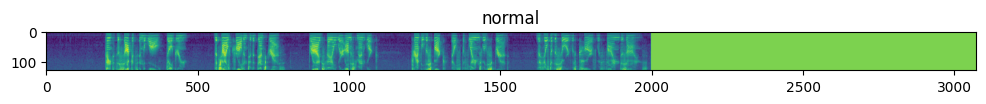

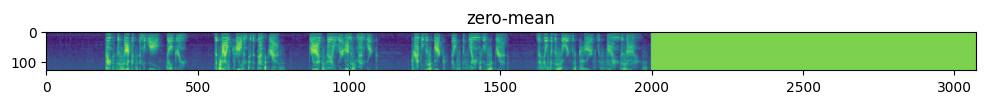

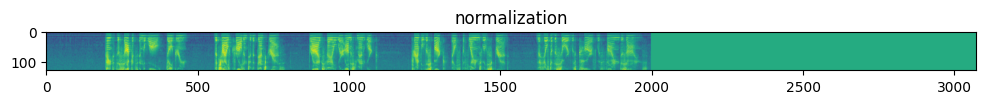

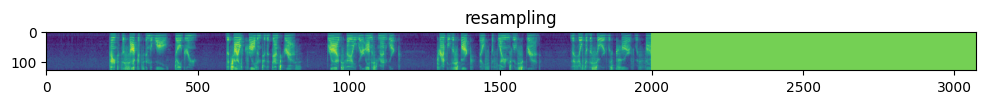

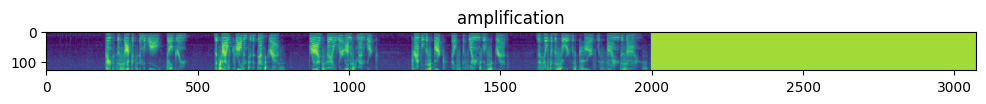

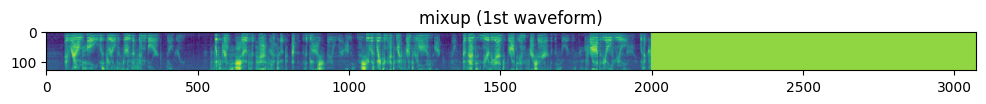

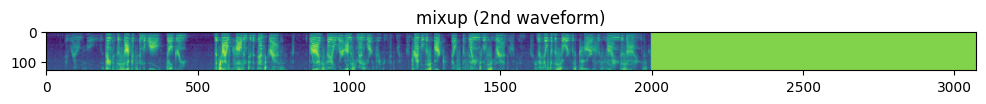

In [6]:
for name, waveform in waveforms.items():
    mel = mel_spectrogram(
        waveform=waveform,
        sample_rate=sr,
        num_mel_bins=MEL_BINS,
        length=3072,  # approximately 30s of audio
        padding=True,
        truncation=True
    )

    plt.figure(figsize=(12, 2))
    plt.imshow(mel.T)
    plt.title(name)
    plt.show